# The analytic bang-bang solution

  
## Reach of the target

Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

where $\beta$ and $m$ are constants of the eye, with $\left[\dfrac{\beta}{m}\right] = s^{-1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
b = 100
m = 1
xT = 20
dt = 0.0001
t_T = .05
t_R = .05
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
v0 = 10. #velocity of the target

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$ and so : $x(t) = x_T - \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = \frac{U_{MAX}}{\beta}\left(1-e^{- \frac{\beta}{m}\rho T} \right ) = -\frac{U_{MAX}}{\beta}\left(1-e^{\frac{\beta}{m}\left(1-\rho\right)T} \right )$.  
  
Finally: $\rho = -\dfrac{m}{\beta T}\ln \left(\dfrac{2}{1+e^{\frac{\beta T}{m}}}\right)$

In [13]:
rho = m/(b*T*dt)*np.log((1+np.exp(b*T*dt/m))/2)
rhoT = int(np.round(T*rho))

The continuity of the position at time $\rho\cdot T $ enables to find $U_{MAX}: U_{MAX} = \dfrac{\beta}{\left (2\rho-1\right)T-\frac{m}{\beta}\left(2-e^{-\frac{\beta}{m}\rho T} - e^{\frac{\beta}{m}\left(1-\rho \right)T}\right)} \cdot  x_T$

Note: since the relation is linear, trajectories are linear in 2D for any target's position.

In [14]:
Umax = b*xT/((2*rho-1)*T*dt-m/b*(2-np.exp(-rho*b*T*dt/m)-np.exp((1-rho)*b*T*dt/m)))

In [15]:
x = np.concatenate((Umax/b*(time[0:rhoT]-m/b*(1-np.exp(-b/m*time[0:rhoT]))),xT+Umax/b*(T*dt-time[rhoT:T]+m/b*(1-np.exp(b/m*(T*dt-time[rhoT:T])))),xT*np.ones(R+1)))
v = np.concatenate((Umax/b*(1-np.exp(-b/m*time[0:rhoT])),-Umax/b*(1-np.exp(b/m*(T*dt-time[rhoT:T]))),np.zeros(R+1)))
u = np.concatenate((Umax*np.ones(rhoT),-Umax*np.ones(T-rhoT),np.zeros(R+1)))

In [16]:
u

array([ 46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026, -46437.13175026,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,  

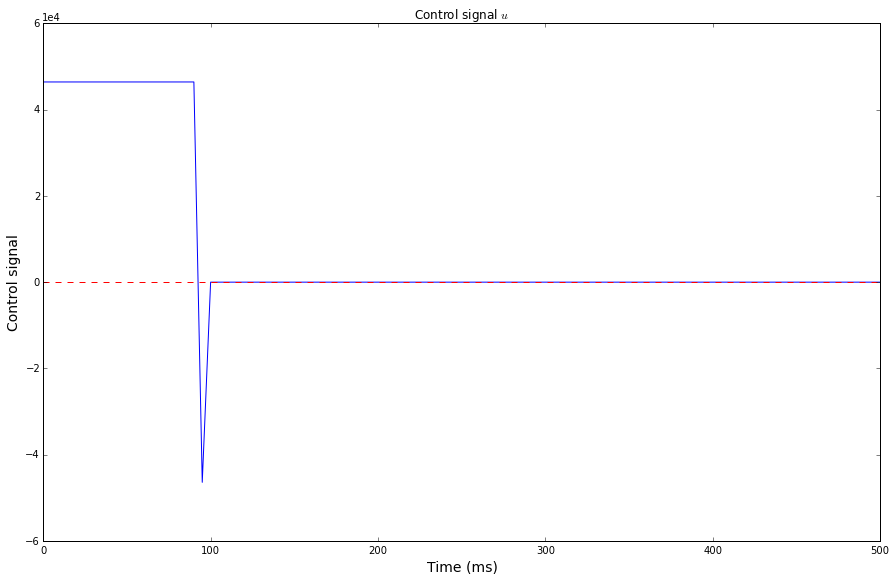

In [17]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)


(-0.5, 40.5)

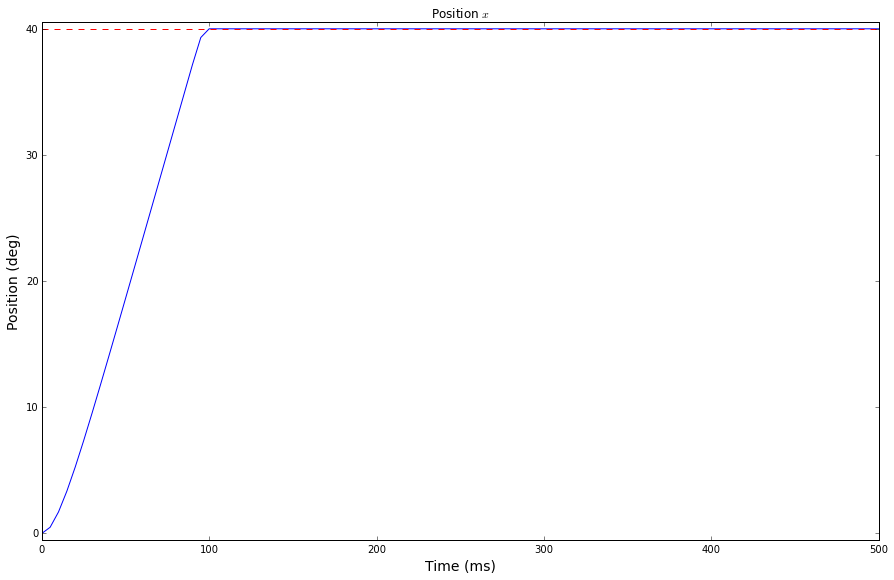

In [18]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x, '-')
ax.plot([0,(t_T+t_R)*1000],[xT,xT], 'r--')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-0.5, xT+0.5)


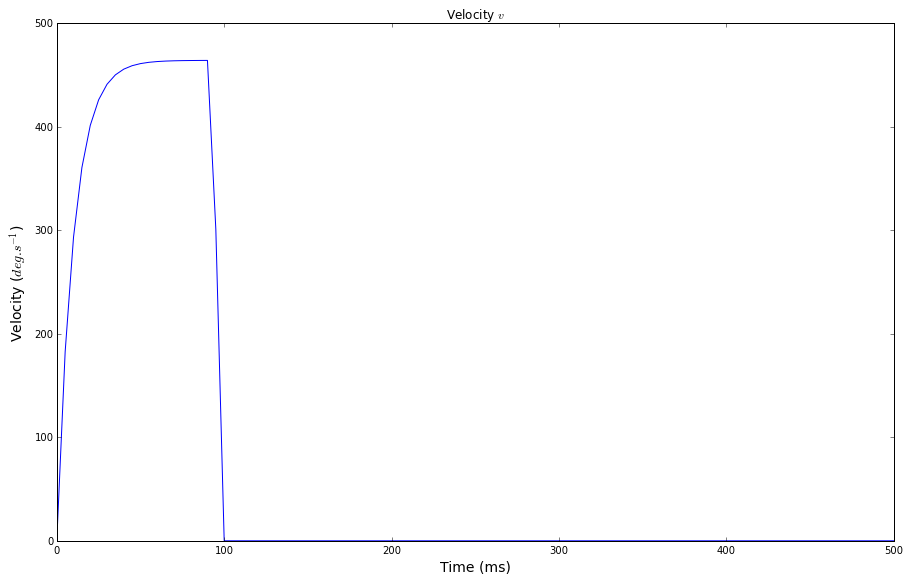

In [19]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')

ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


## Reach and pursuit of the target

Here, the target is moving with the velocity $v$. We want to reach the moving target (which position at time $t$ is $x_T+v t$ and then follow it. 

Again, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right ) + v\cdot e^{\frac{\beta}{m}\left (T-t\right)}$ and so : $x(t) = x_T +v\cdot T- \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right] + v\cdot \frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = \beta\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = \frac{U_{MAX}}{\beta}\left(1-e^{- \frac{\beta}{m}\rho T} \right ) = -\frac{U_{MAX}}{\beta}\left(1-e^{\frac{\beta}{m}\left(1-\rho\right)T} \right )+v\cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}$.  
  
Finally: $U_{MAX} = -\dfrac{\beta \cdot v \cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}}{2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}}$


The continuity of the position at time $\rho \cdot T$ enables to find the value of $\rho$.
Indeed, $\rho$ is the unique solution in $\intervalle{0}{1}$ of :
$$
\left(x_T+vT \right)\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right) +v\cdot\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right)\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right)-v\cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}\left [\left(2\rho-1\right)T-\frac{m}{\beta}\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T} \right )\right] = 0
$$

Numerically, we find $\rho$, and then we deduce $U_{MAX}$, which enables to compute the position and the velocity of the bangbang.

In [146]:
tau = m/b

(0.5, 1)

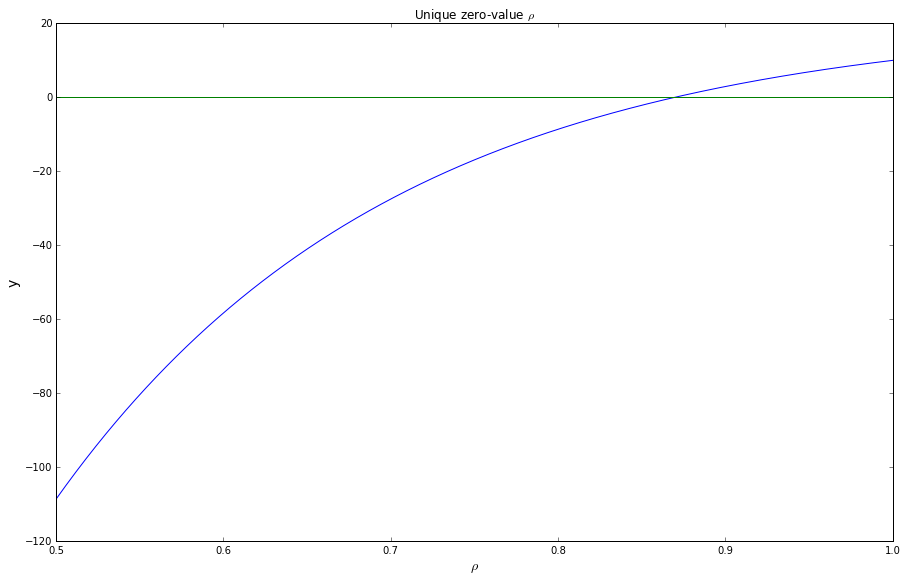

In [147]:
vrho = np.linspace(0.5,1,1001)
y = (xT+v0*t_T+v0*tau*(1-np.exp((1-vrho)*t_T/tau)))*(2-np.exp(-vrho*t_T/tau)-np.exp((1-vrho)*t_T/tau))+v0*np.exp((1-vrho)*t_T/tau)*((1-vrho)*t_T+tau*(1-np.exp((1-vrho)*t_T/tau)))-v0*np.exp((1-vrho)*t_T/tau)*(vrho*t_T-tau*(1-np.exp(-vrho*t_T/tau)))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(vrho,y)
ax.plot([0.5,1],[0,0])
ax.set_title(r'Unique zero-value $\rho$')
ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim(0.5, 1)


In [148]:
rho_pursuit = vrho[np.argmin(np.abs(y))]
Umax_pursuit = b*v0*np.exp((1-rho_pursuit)*t_T/tau)/(2-np.exp((1-rho_pursuit)*t_T/tau)-np.exp(-rho_pursuit*t_T/tau))
rhoT_pursuit = int(np.round(T*rho_pursuit))

In [149]:
Umax_pursuit

28779.763049448244

In [150]:
x_pursuit = np.concatenate((Umax_pursuit/b*(time[0:rhoT_pursuit]-m/b*(1-np.exp(-b/m*time[0:rhoT_pursuit]))),xT+v0*T*dt+Umax_pursuit/b*(T*dt-time[rhoT_pursuit:T]+m/b*(1-np.exp(b/m*(T*dt-time[rhoT_pursuit:T]))))+m/b*v0*(1-np.exp(b/m*(T*dt-time[rhoT_pursuit:T]))),xT+v0*T*dt+v0*(time[T:(T+R+1)]-t_T)))
v_pursuit = np.concatenate((Umax_pursuit/b*(1-np.exp(-b/m*time[0:rhoT_pursuit])),-Umax_pursuit/b*(1-np.exp(b/m*(T*dt-time[rhoT_pursuit:T])))+v0*np.exp(b/m*(T*dt-time[rhoT_pursuit:T])),v0*np.ones(R+1)))
u_pursuit = np.concatenate((Umax_pursuit*np.ones(rhoT_pursuit),-Umax_pursuit*np.ones(T-rhoT_pursuit),b*v0*np.ones(R+1)))

In [151]:
u_pursuit

array([ 28779.76304945,  28779.76304945,  28779.76304945, ...,
         1000.        ,   1000.        ,   1000.        ])

(-35000, 35000)

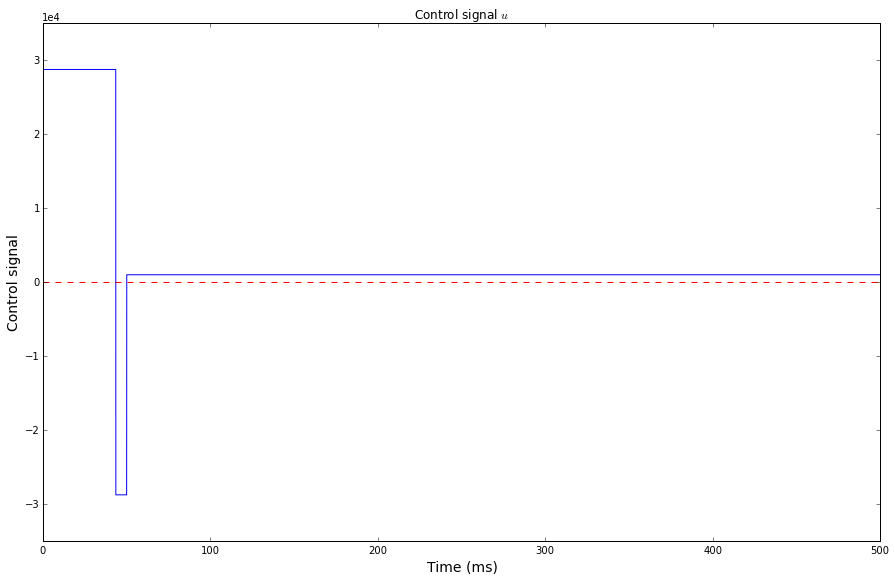

In [152]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u_pursuit, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
ax.set_ylim(-35000, 35000)


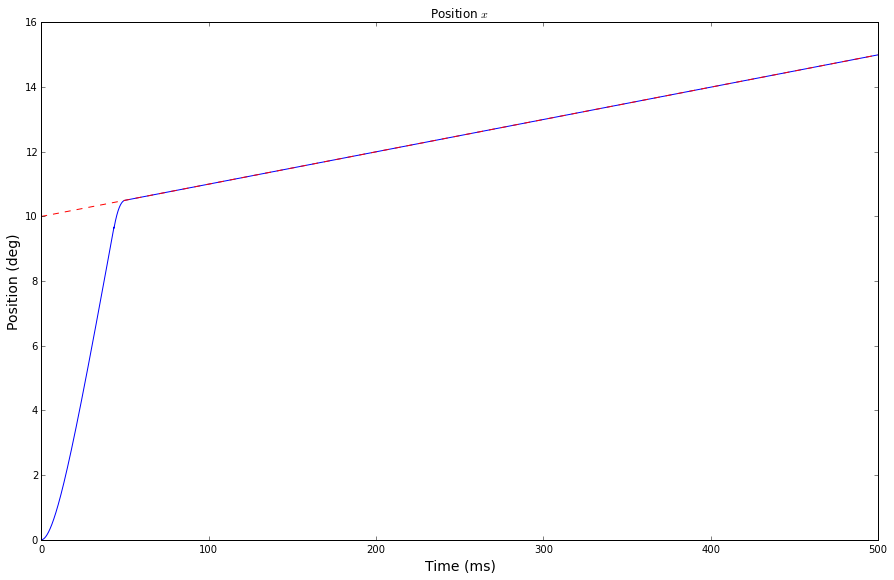

In [153]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x_pursuit, '-')
ax.plot([0,(t_T+t_R)*1000],[10,xT+v0*(t_T+t_R)], 'r--')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


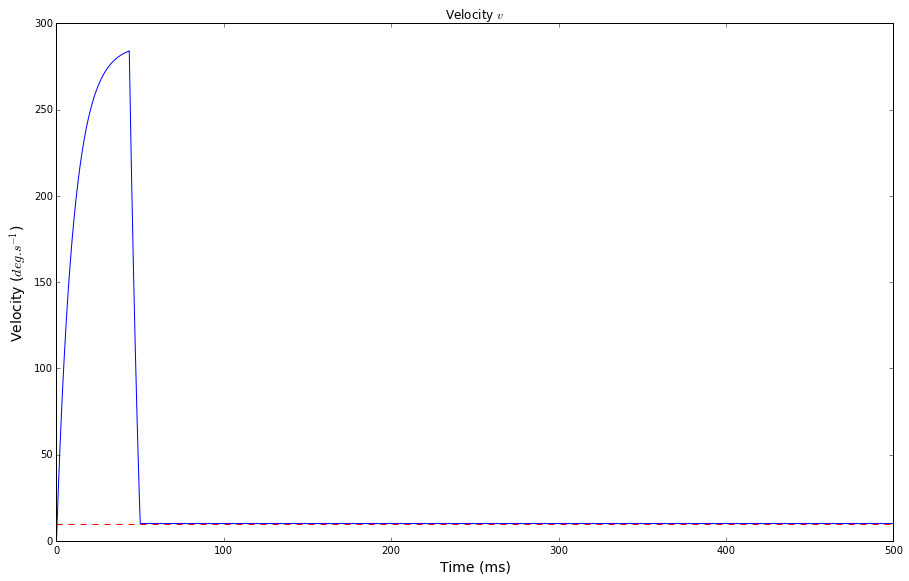

In [154]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v_pursuit, '-')
ax.set_title(r'Velocity $v$')
ax.plot([0,(t_T+t_R)*1000],[v0,v0], 'r--')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


In [258]:
n = 100

In [259]:
rho = np.linspace(0.5,0.999,n)

In [260]:
Uplus = b*xT*(1-np.exp((1-rho)*b*T*dt/m))/(T*dt-(1-rho)*T*dt*np.exp(-rho*b*T*dt/m)-rho*T*dt*np.exp((1-rho)*b*T*dt/m))

In [261]:
Umoins = b*xT*(1-np.exp(-rho*b*T*dt/m))/(T*dt-(1-rho)*T*dt*np.exp(-rho*b*T*dt/m)-rho*T*dt*np.exp((1-rho)*b*T*dt/m))

In [262]:
u = np.zeros((n,T+R+1))

for i in np.arange(n):
    rhoT = np.round(T*rho[i])
    u[i,:] = np.concatenate((Uplus[i]*np.ones(rhoT),Umoins[i]*np.ones(T-rhoT),np.zeros(R+1)))

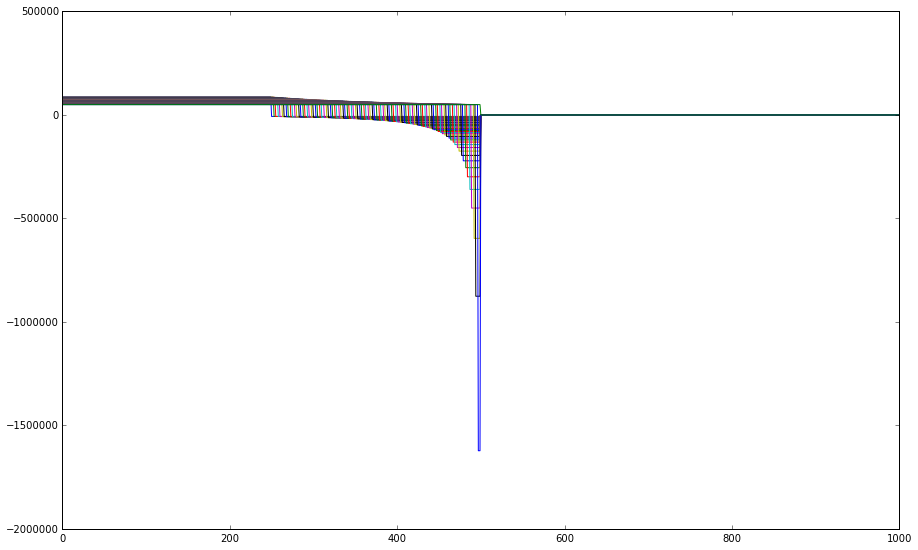

In [263]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n):
    ax.plot(u[i,:])

In [264]:
def fact(n): 
    """The factorial function
    Returns n!, that is n x (n-1) x (n-2) x ... x 1
    Recursive implementation
    """
    if n == 0:
        return 1
    else:
        return(n*fact(n-1))

In [265]:
# definition of A and B
beta = b
A = np.zeros((2,2))
B = np.zeros(2)
for i in np.arange(2):
    for j in np.arange(i,2):
        A[i,j] = dt**(j-i)/fact(j-i)
A[1, 1] = 1-dt*beta/m
B[1] = dt/m

In [266]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,2,2))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])

In [267]:
k = 0.05

In [268]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return (m**2)*k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()

In [269]:
variancev = np.zeros((n,T+R+1))

for i in np.arange(n):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(u[i,:], j)

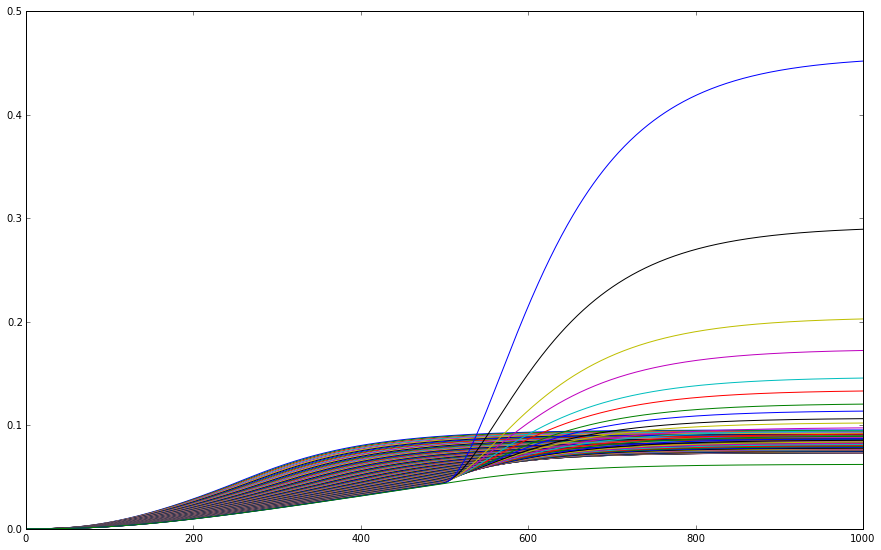

In [270]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n):
    ax.plot(variancev[i,:])

In [278]:
u[99,T-1]

49946.897425485142

In [279]:
somme = np.zeros(98)
for i in np.arange(98):
    for j in T+np.arange(R+1):
        somme[i] += variancev[i,j]

In [280]:
np.min(somme), np.argmin(somme)

(35.051123265035379, 64)

In [281]:
rho[64]

0.82258585858585853

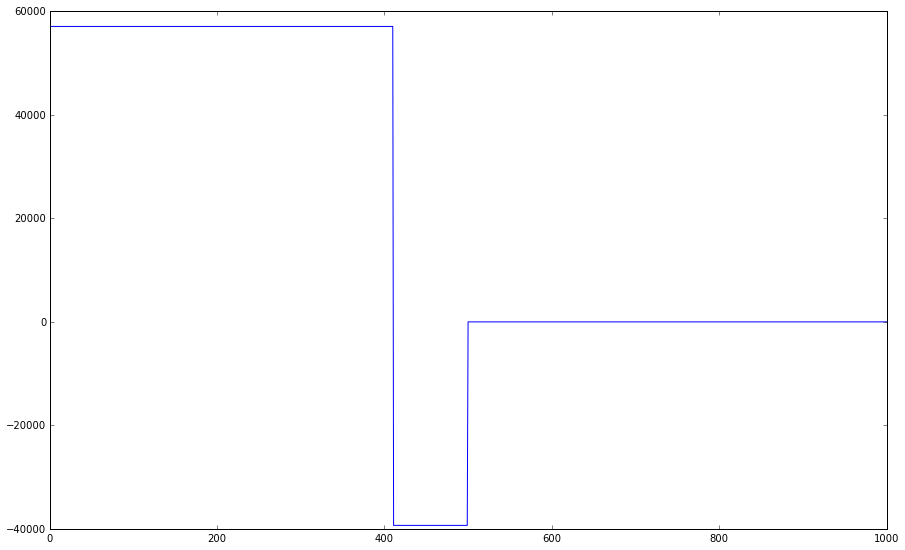

In [283]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(u[64,:])

In [284]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return np.array([0,0])
    else:
        return (ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

In [285]:
position = np.zeros((n,T+R+1))
velocity = np.zeros((n,T+R+1))

for i in np.arange(n):
    for j in np.arange(T+R+1):
        mean = expectation(u[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]

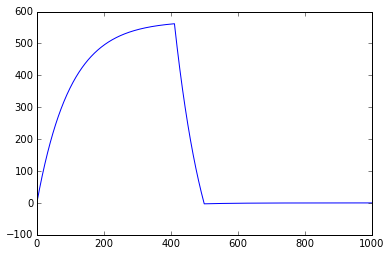

In [286]:
plt.plot(velocity[64,:])

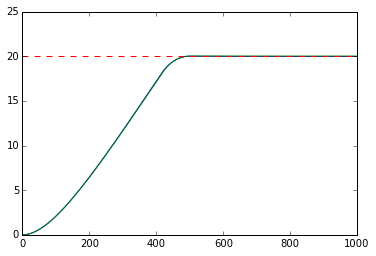

In [288]:
plt.plot(position[64,:])
plt.plot(position[65,:])

plt.plot([0,1000],[20,20],'r--')

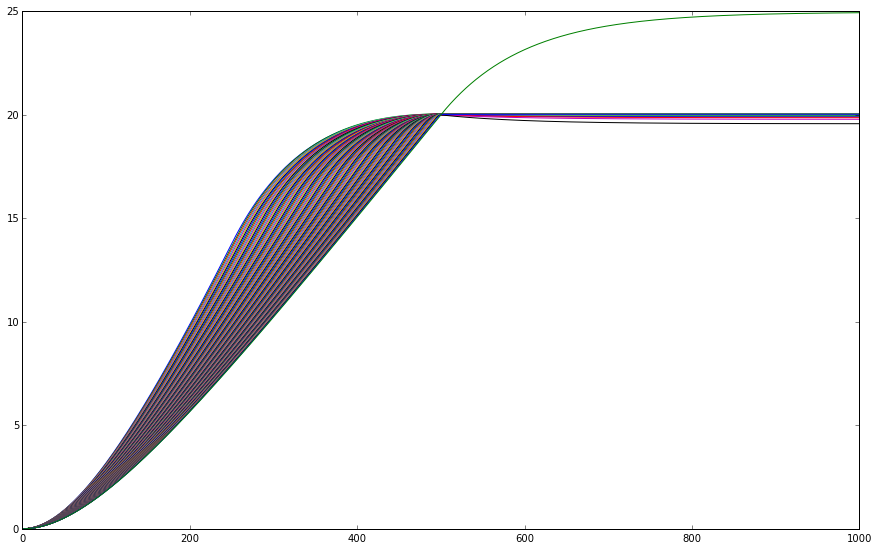

In [289]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n):
    ax.plot(position[i,:])

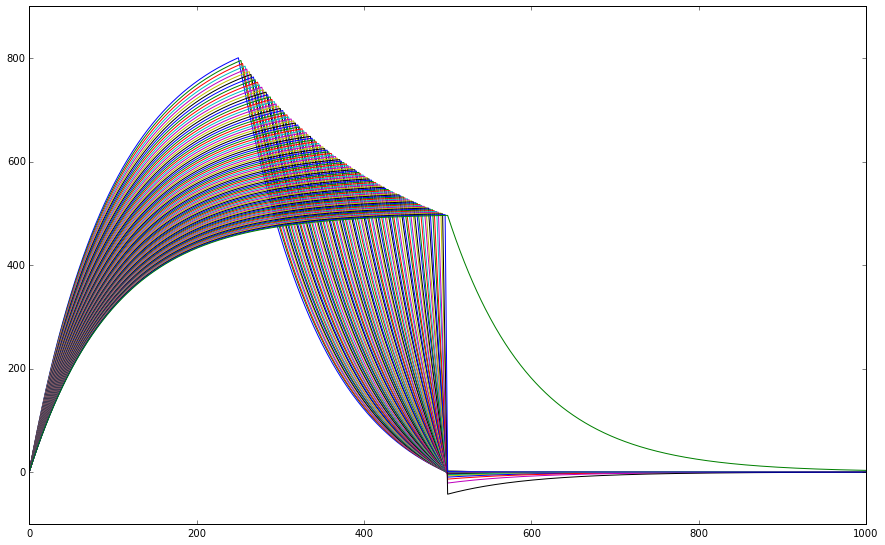

In [290]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n):
    ax.plot(velocity[i,:])